In [1]:
!pip install tqdm

import numpy as np
import os
from random import shuffle
from tqdm import tqdm

In [2]:
TRAIN_DIR = 'C:/Users/acer/Desktop/ML/Cats_And_Dogs/train'
TEST_DIR = 'C:/Users/acer/Desktop/ML/Cats_And_Dogs/test1'

In [47]:
IMG_SIZE = 40
learning_rate = 0.5

In [4]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat':
        return[1, 0]
    elif word_label == 'dog':
        return[0, 1]

In [5]:
import cv2

## For extracting the image data.

In [6]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.imread(TRAIN_DIR)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_COLOR), (IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [128]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        testing_data.append([np.array(img), np.array(img_num)])
    
    np.save('test_data.npy', testing_data)
    return testing_data

In [8]:
train_data = create_train_data()

100%|█| 25000/25000


In [9]:
train_data[1][0]

array([[[ 94, 155, 147],
        [ 97, 150, 147],
        [102, 154, 149],
        ...,
        [ 94, 138, 140],
        [123, 168, 172],
        [103, 160, 151]],

       [[ 84, 145, 136],
        [ 92, 148, 150],
        [ 79, 136, 136],
        ...,
        [100, 153, 144],
        [115, 176, 164],
        [124, 171, 170]],

       [[106, 160, 168],
        [113, 184, 177],
        [125, 183, 193],
        ...,
        [159, 198, 203],
        [159, 199, 204],
        [177, 217, 222]],

       ...,

       [[ 69, 156, 135],
        [ 56, 165, 114],
        [ 77, 164, 130],
        ...,
        [ 93, 168, 160],
        [123, 182, 181],
        [100, 157, 155]],

       [[ 97, 174, 147],
        [ 72, 158, 143],
        [ 41, 134, 111],
        ...,
        [121, 207, 209],
        [132, 198, 197],
        [152, 209, 201]],

       [[ 72, 141, 131],
        [102, 197, 169],
        [141, 217, 192],
        ...,
        [ 93, 203, 186],
        [151, 214, 230],
        [102, 170, 169]]

In [10]:
np.random.seed(1)

In [11]:
type(train_data), type(train_data[0])

(list, list)

In [12]:
train_data[:5]

[[array([[[ 19,  30,  19],
          [ 20,  24,  17],
          [ 31,  41,  29],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[ 12,  20,  13],
          [ 14,  22,  15],
          [ 27,  37,  24],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         [[ 29,  56,  38],
          [ 23,  49,  31],
          [ 22,  44,  26],
          ...,
          [255, 255, 255],
          [255, 255, 255],
          [255, 255, 255]],
  
         ...,
  
         [[ 10,  29,  12],
          [ 14,  27,  11],
          [ 27,  41,  24],
          ...,
          [ 23,  53,  34],
          [ 29,  49,  31],
          [ 23,  51,  28]],
  
         [[ 13,  31,  16],
          [ 38,  46,  33],
          [ 21,  29,  18],
          ...,
          [ 18,  24,   9],
          [ 39,  35,  26],
          [ 18,  27,  14]],
  
         [[ 31,  46,  32],
          [ 26,  47,  32],
          [ 16,  29,  17

In [13]:
type(train_data[0][0]), train_data[0][0].shape

(numpy.ndarray, (40, 40, 3))

In [14]:
train_set_X = []

for i in range(25000):
    train_set_X.append(train_data[i][0])

In [15]:
train_set_X

[array([[[ 19,  30,  19],
         [ 20,  24,  17],
         [ 31,  41,  29],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 12,  20,  13],
         [ 14,  22,  15],
         [ 27,  37,  24],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[ 29,  56,  38],
         [ 23,  49,  31],
         [ 22,  44,  26],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[ 10,  29,  12],
         [ 14,  27,  11],
         [ 27,  41,  24],
         ...,
         [ 23,  53,  34],
         [ 29,  49,  31],
         [ 23,  51,  28]],
 
        [[ 13,  31,  16],
         [ 38,  46,  33],
         [ 21,  29,  18],
         ...,
         [ 18,  24,   9],
         [ 39,  35,  26],
         [ 18,  27,  14]],
 
        [[ 31,  46,  32],
         [ 26,  47,  32],
         [ 16,  29,  17],
         ...,
         [ 75,  60,  55],
  

In [16]:
train_X = np.array(train_set_X)

In [17]:
train_X.shape

(25000, 40, 40, 3)

In [18]:
Xtrain = train_X.reshape(train_X.shape[0], -1).T
Xtrain.shape

(4800, 25000)

## Flattening the data.

In [19]:
Xtrain = Xtrain/255

In [20]:
train_set_y = []

for i in range(25000):
    train_set_y.append([train_data[i][1][0]])

In [21]:
train_set_y

[[0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1]

In [22]:
train_y = np.array(train_set_y)

In [23]:
train_y.shape

(25000, 1)

In [24]:
ytrain = train_y.reshape(1, 25000)

In [25]:
ytrain.shape

(1, 25000)

### Defining sigmoid function for the activation of last layer of the neural network and relu function for the activation of other layers of the neural network for forward propagation.

In [26]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

In [27]:
def relu(Z):
    A = np.maximum(0, Z)
    return A

### Defining sigmoid_backward function for the last layer of the neural network and relu function for other layers of the neural network for backward propagation.

In [28]:
def sigmoid_backward(Z, dA):
    s = 1/(1+np.exp(-Z))
    dZ = dA*s*(1-s)
    
    assert(dZ.shape == Z.shape)
    return dZ

In [29]:
def relu_backward(Z, dA):
    dZ = np.array(dA, copy = True)
    
    dZ[Z<=0] = 0
    
    assert(dZ.shape == Z.shape)
    return dZ

In [30]:
m = Xtrain.shape[1]
n_X = Xtrain.shape[0]
m, n_X

(25000, 4800)

In [31]:
n_h1, n_h2, n_h3, n_y = (10, 10, 5, 1)

## Defining the dimensions of the layers:
#### First layer contains the input features so 'n_X' units.
#### Second layer (first hidden layer) contains 10 units.
#### Third layer (second hidden layer) contains 10 units.
#### Fourth layer (third hidden layer) contains 5 units.
#### Final layer (first hidden layer) contains 1 unit that does the binary classification.

In [32]:
layer_dimensions = [n_X, 10, 10, 5, 1]
L = len(layer_dimensions)

In [33]:
import random
np.random.seed()

### Randomly initializing the weights W and initializing b with zeroes.

In [52]:
W1 = np.random.randn(n_h1, n_X) * 0.2
b1 = np.zeros((n_h1, 1))
W2 = np.random.randn(n_h2, n_h1) * 0.2
b2 = np.zeros((n_h2, 1))
W3 = np.random.randn(n_h3, n_h2) * 0.2
b3 = np.zeros((n_h3, 1))
W4 = np.random.randn(n_y, n_h3) * 0.2
b4 = np.zeros((n_y, 1))

## Repeating the process:
### Forward propagation > Finding the cost (logistic loss) > Backward propagation > Upgrading the parameters (gradient descent)
#### to minimize the cost error.  

In [53]:
costs = []
for i in range(0, 5001):
    # forward propagation
    Z1 = np.dot(W1, Xtrain) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)
    
    # cost function
    cost = -(1/m) * np.sum(np.multiply(ytrain, np.log(A4)) + np.multiply((1-ytrain), np.log(1-A4)))
    cost = np.squeeze(cost)
    costs.append(cost)
    
    # backward propagation
    dA4 = A4 - ytrain
    dZ4 = sigmoid_backward(Z4, dA4)
    dW4 = (1/m) * np.dot(dZ4, A3.T)
    db4 = (1/m) * np.sum(dZ4, axis = 1, keepdims = True)
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = relu_backward(Z3, dA3)
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = relu_backward(Z2, dA2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = relu_backward(Z1, dA1)
    dW1 = (1/m) * np.dot(dZ1, Xtrain.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    # updating the parameters w1, b1, w2 and b2
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    W4 = W4 - learning_rate*dW4
    b4 = b4 - learning_rate*db4
    
    if i%100 == 0:
        print("cost after", i, "iterations:", cost)

cost after 0 iterations: 0.7569547845275473
cost after 100 iterations: 0.6864591012220435
cost after 200 iterations: 0.6811440484568599
cost after 300 iterations: 0.6764648826764897
cost after 400 iterations: 0.6722738648927881
cost after 500 iterations: 0.6685936709570759
cost after 600 iterations: 0.6656192447063948
cost after 700 iterations: 0.6630181080087771
cost after 800 iterations: 0.6602727174611804
cost after 900 iterations: 0.657947136949653
cost after 1000 iterations: 0.6555781959144102
cost after 1100 iterations: 0.6535381714878659
cost after 1200 iterations: 0.6514240508031093
cost after 1300 iterations: 0.6493066647662421
cost after 1400 iterations: 0.6475331977242443
cost after 1500 iterations: 0.6458509840858708
cost after 1600 iterations: 0.6441590197959625
cost after 1700 iterations: 0.6424532619099461
cost after 1800 iterations: 0.6409329940772778
cost after 1900 iterations: 0.6393842454790506
cost after 2000 iterations: 0.6378364976975641
cost after 2100 iterations

In [60]:
for i in range(0, 101):
    # forward propagation
    Z1 = np.dot(W1, Xtrain) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)
    
    # cost function
    cost = -(1/m) * np.sum(np.multiply(ytrain, np.log(A4)) + np.multiply((1-ytrain), np.log(1-A4)))
    cost = np.squeeze(cost)
    
    # backward propagation
    dA4 = A4 - ytrain
    dZ4 = sigmoid_backward(Z4, dA4)
    dW4 = (1/m) * np.dot(dZ4, A3.T)
    db4 = (1/m) * np.sum(dZ4, axis = 1, keepdims = True)
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = relu_backward(Z3, dA3)
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis = 1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = relu_backward(Z2, dA2)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = relu_backward(Z1, dA1)
    dW1 = (1/m) * np.dot(dZ1, Xtrain.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    # updating the parameters w1, b1, w2 and b2
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    W4 = W4 - learning_rate*dW4
    b4 = b4 - learning_rate*db4
    
    if i%100 == 0:
        print("cost after more iterations:", cost)

cost after more iterations: 0.6032035235554183
cost after more iterations: 0.6021805718505829


In [129]:
test_data = process_test_data()

100%|█| 12500/12500


In [130]:
len(test_data)

12500

In [131]:
min_test_data = test_data[:100]

In [132]:
test_set_X = []

for i in range(100):
    test_set_X.append(min_test_data[i][0])

In [133]:
test_set_X[0].shape

(40, 40, 3)

In [134]:
test_X = np.array(test_set_X)

In [135]:
test_X.shape

(100, 40, 40, 3)

In [136]:
Xtest = test_X.reshape(test_X.shape[0], -1).T
Xtest1 = Xtest/255
Xtest1.shape

(4800, 100)

## Predicting the class of the image with the help of the model.

In [137]:
predicted_y = list()
def model(Xtest1):
    Z1 = np.dot(W1, Xtest1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = relu(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = sigmoid(Z4)
    return A4

In [138]:
y_dash = model(Xtest1)

In [139]:
y_dash.shape

(1, 100)

In [161]:
y_pred = []
for i in range(len(y_dash[0])):
    if y_dash[0][i]>0.5:
        y_pred.append('cat')
    else:
        y_pred.append('dog')

In [162]:
y_pred

['cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'cat',
 'cat',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'dog',
 'cat',
 'cat',
 'dog',
 'cat',
 'dog',
 'cat',
 'dog',
 'dog',
 'dog',
 'cat',
 'cat',
 'dog',
 'dog',
 'dog',
 'dog']

In [153]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (200, 200))
        testing_data.append([np.array(img), np.array(img_num)])
    
    np.save('test_data.npy', testing_data)
    return testing_data

test_data = process_test_data()
min_test_data = test_data[:100]


  0%| | 0/12500 [00
  0%| | 44/12500 [0
  1%| | 89/12500 [0
  1%| | 145/12500 [
  2%| | 202/12500 [
  2%| | 259/12500 [
  2%| | 309/12500 [
  3%| | 364/12500 [
  3%| | 419/12500 [
  4%| | 470/12500 [
  4%| | 523/12500 [
  5%| | 575/12500 [
  5%| | 626/12500 [
  5%| | 677/12500 [
  6%| | 728/12500 [
  6%| | 785/12500 [
  7%| | 841/12500 [
  7%| | 898/12500 [
  8%| | 952/12500 [
  8%| | 1006/12500 
  8%| | 1059/12500 
  9%| | 1112/12500 
  9%| | 1166/12500 
 10%| | 1219/12500 
 10%| | 1272/12500 
 11%| | 1325/12500 
 11%| | 1381/12500 
 11%| | 1434/12500 
 12%| | 1485/12500 
 12%| | 1536/12500 
 13%|▏| 1589/12500 
 13%|▏| 1640/12500 
 14%|▏| 1691/12500 
 14%|▏| 1741/12500 
 14%|▏| 1795/12500 
 15%|▏| 1854/12500 
 15%|▏| 1906/12500 
 16%|▏| 1959/12500 
 16%|▏| 2011/12500 
 16%|▏| 2062/12500 
 17%|▏| 2113/12500 
 17%|▏| 2164/12500 
 18%|▏| 2214/12500 
 18%|▏| 2264/12500 
 19%|▏| 2317/12500 
 19%|▏| 2374/12500 
 19%|▏| 2426/12500 
 20%|▏| 2477/12500 
 20%|▏| 2527/12500 
 21%|▏| 2577/12500 

 63%|▋| 7833/12500 
 63%|▋| 7843/12500 
 63%|▋| 7853/12500 
 63%|▋| 7862/12500 
 63%|▋| 7871/12500 
 63%|▋| 7880/12500 
 63%|▋| 7889/12500 
 63%|▋| 7898/12500 
 63%|▋| 7906/12500 
 63%|▋| 7913/12500 
 63%|▋| 7919/12500 
 63%|▋| 7925/12500 
 63%|▋| 7931/12500 
 64%|▋| 7938/12500 
 64%|▋| 7948/12500 
 64%|▋| 7955/12500 
 64%|▋| 7963/12500 
 64%|▋| 7970/12500 
 64%|▋| 7980/12500 
 64%|▋| 7988/12500 
 64%|▋| 7996/12500 
 64%|▋| 8004/12500 
 64%|▋| 8012/12500 
 64%|▋| 8020/12500 
 64%|▋| 8027/12500 
 64%|▋| 8034/12500 
 64%|▋| 8041/12500 
 64%|▋| 8049/12500 
 64%|▋| 8058/12500 
 65%|▋| 8066/12500 
 65%|▋| 8074/12500 
 65%|▋| 8082/12500 
 65%|▋| 8090/12500 
 65%|▋| 8097/12500 
 65%|▋| 8108/12500 
 65%|▋| 8117/12500 
 65%|▋| 8126/12500 
 65%|▋| 8134/12500 
 65%|▋| 8142/12500 
 65%|▋| 8150/12500 
 65%|▋| 8158/12500 
 65%|▋| 8167/12500 
 65%|▋| 8177/12500 
 65%|▋| 8185/12500 
 66%|▋| 8194/12500 
 66%|▋| 8203/12500 
 66%|▋| 8213/12500 
 66%|▋| 8223/12500 
 66%|▋| 8232/12500 
 66%|▋| 8240/12500 


 92%|▉| 11483/12500
 92%|▉| 11496/12500
 92%|▉| 11509/12500
 92%|▉| 11527/12500
 92%|▉| 11540/12500
 92%|▉| 11554/12500
 93%|▉| 11573/12500
 93%|▉| 11588/12500
 93%|▉| 11602/12500
 93%|▉| 11615/12500
 93%|▉| 11628/12500
 93%|▉| 11648/12500
 93%|▉| 11662/12500
 93%|▉| 11681/12500
 94%|▉| 11696/12500
 94%|▉| 11711/12500
 94%|▉| 11725/12500
 94%|▉| 11740/12500
 94%|▉| 11754/12500
 94%|▉| 11767/12500
 94%|▉| 11780/12500
 94%|▉| 11796/12500
 95%|▉| 11813/12500
 95%|▉| 11828/12500
 95%|▉| 11846/12500
 95%|▉| 11860/12500
 95%|▉| 11874/12500
 95%|▉| 11886/12500
 95%|▉| 11900/12500
 95%|▉| 11912/12500
 95%|▉| 11924/12500
 95%|▉| 11935/12500
 96%|▉| 11948/12500
 96%|▉| 11966/12500
 96%|▉| 11980/12500
 96%|▉| 11995/12500
 96%|▉| 12011/12500
 96%|▉| 12027/12500
 96%|▉| 12041/12500
 96%|▉| 12055/12500
 97%|▉| 12069/12500
 97%|▉| 12082/12500
 97%|▉| 12098/12500
 97%|▉| 12112/12500
 97%|▉| 12127/12500
 97%|▉| 12146/12500
 97%|▉| 12161/12500
 97%|▉| 12178/12500
 98%|▉| 12192/12500
 98%|▉| 12206/12500


In [154]:
test_data[0][0].shape

(200, 200, 3)

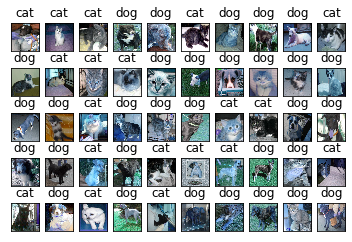

In [166]:
import matplotlib.pyplot as plt
i = 0

fig = plt.figure()

for num, data in enumerate(min_test_data[:50]):
    img_data = data[0]
    img_num = data[1]
    
    y = fig.add_subplot(5, 10, num+1)
    orig = img_data
    data = img_data.reshape(200, 200, 3)
    
    y.imshow(orig)
    plt.title(y_pred[i])
    i = i+1
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

## Results are above.